# **Importing Modules**

In [1]:
from skimage import feature, io
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio.v2 as imageio
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray 
from skimage.transform import resize 
from skimage import data,feature
from sklearn.model_selection import train_test_split 
import matplotlib as mpl
import imageio
import cv2
import glob
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

# **Taking dataset**

In [5]:
datasetpath = '/kaggle/input/grapeds'

converting dataset to batchs by tensorflow pipeline

In [6]:
BATCH_SIZE = 30
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    datasetpath,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


# **conveting dataset to GLCM**

In [7]:
from skimage import io
from sklearn import preprocessing
# from skimage.feature.graycoprops import greycoprops
def glcm_feature(img):
    S = preprocessing.MinMaxScaler((0,11)).fit_transform(img).astype(int)
    Grauwertmatrix = feature.graycomatrix(S, [1,2,3], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=12, symmetric=False, normed=True)

    ContrastStats = feature.graycoprops(Grauwertmatrix, 'contrast')
    CorrelationtStats = feature.graycoprops(Grauwertmatrix, 'correlation')
    HomogeneityStats = feature.graycoprops(Grauwertmatrix, 'homogeneity')
    ASMStats = feature.graycoprops(Grauwertmatrix, 'ASM')
    fea =[np.mean(ContrastStats), np.mean(CorrelationtStats),np.mean(ASMStats), np.mean(HomogeneityStats)]
    return fea
    


In [11]:
dataseth = []
datalabel = []
featureo =[]
for image_batch, labels_batch in dataset.take(150):
    for i in range(30):
#         img = image_batch[i].numpy().astype("uint8")
        img = image_batch[i].numpy().astype("float")
        grayim = rgb2gray(img) 
        gI1 = resize(grayim,(256,256))
#         (H, hogImage) = feature.hog(gI1, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2), transform_sqrt=True, visualize=True,channel_axis=2)
        glcm = glcm_feature(gI1)
        image = np.array(glcm).flatten()
        dataseth.append(image)
        featureo.append(glcm)
        datalabel.append(labels_batch[i])

# **implementing KNN**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
x_train,x_test,y_train,y_test = train_test_split(featureo,datalabel,test_size= 0.18)
knn.fit(x_train,y_train)

In [15]:
knn.score(x_test,y_test)

0.662962962962963

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm =confusion_matrix(y_test,y_pred)
cm

array([[123,  27,  29],
       [ 40, 100,  37],
       [ 39,  10, 135]])

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel('truth')


Text(42.0, 0.5, 'truth')
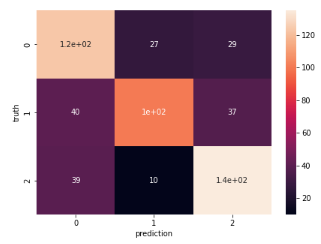

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.61      0.69      0.65       179
           1       0.73      0.56      0.64       177
           2       0.67      0.73      0.70       184

    accuracy                           0.66       540
   macro avg       0.67      0.66      0.66       540
weighted avg       0.67      0.66      0.66       540

In [1]:
acc = []
for i in range(20):
    knn = KNeighborsClassifier(n_neighbors=9)
    x_train,x_test,y_train,y_test = train_test_split(featureo,datalabel,test_size= 0.18)
    knn.fit(x_train,y_train)
    acc1 = knn.score(x_test,y_test)
    acc.append(acc1)
    i= i-1
    

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(range(20), acc, label='Training Accuracy')
# plt.plot(EPOCHS, acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training  Accuracy')
plt.show()

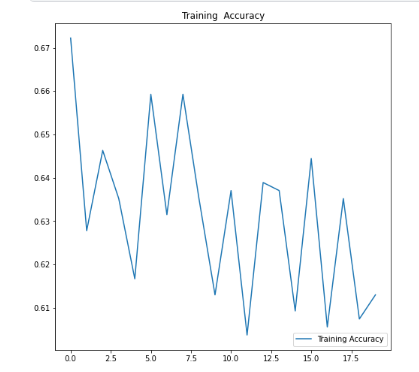